<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/GMRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import scipy.sparse.linalg as spla
import numpy as np
from scipy import sparse
import scipy.linalg as la
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Random matrices

In [35]:
n = 300
B = np.random.randn(n, n)/np.sqrt(n)

Text(0.5, 1.0, 'Eigenvalues of random matrix')

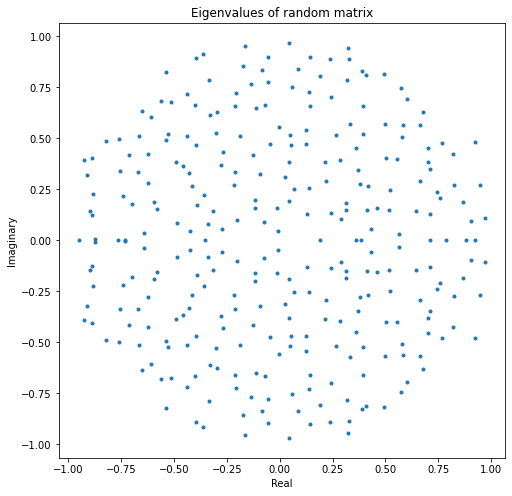

In [36]:
eigvals = la.eigvals(B)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(eigvals.real, eigvals.imag, '.')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Eigenvalues of random matrix')

## Implementing GMRES 

In [41]:
# solving the following linear equation: Ax=b
b = np.random.rand(300)
A = B + 2*np.identity(n)

## GMRES
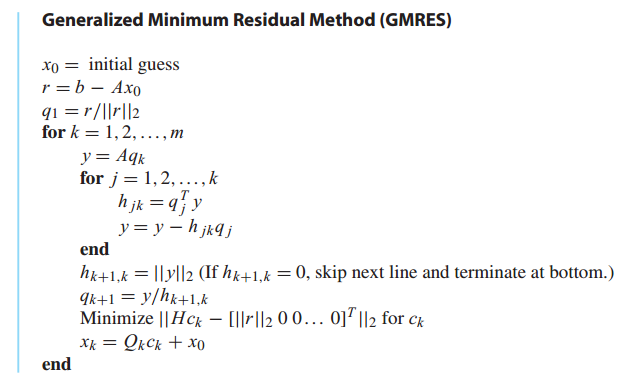

In [42]:
def GMRes(A, b, e=1e-5, nmax_iter=20, x0=None):
    '''
    Generalized Mininum Residuem Method (GMRES)
    A:  input square matrix
    b:  vector
    x0: initial guess
    e: precision
    output: a list of solutions from successive Krylov subspaces 
    '''

    # reset max iter
    max_iter = min(nmax_iter, A.shape[0])

    # initial guess
    if x0 is None:
      x0 = np.random.randn(len(b))

    # store the solutions
    x = [x0]
    
    r = b - np.asarray(np.dot(A, x0)).reshape(-1)
    q = [0] * (nmax_iter)
    q[0] = r / np.linalg.norm(r)
    h = np.zeros((nmax_iter + 1, nmax_iter))

    for k in range(max_iter):
        y = np.asarray(np.dot(A, q[k])).reshape(-1)

        for j in range(k+1):
            h[j, k] = np.dot(q[j], y)
            y = y - h[j, k] * q[j]
        h[k + 1, k] = np.linalg.norm(y)
        if (h[k + 1, k] != 0 and k != nmax_iter - 1):
            q[k + 1] = y / h[k + 1, k]

        b = np.zeros(nmax_iter + 1)
        b[0] = np.linalg.norm(r)

        result = np.linalg.lstsq(h, b)[0]

        soln = np.dot(np.asarray(q).transpose(), result) + x0
        x.append(soln)
        
        if la.norm(A@(soln-x0)-r) < e:
          break        
  
    return x

In [47]:
x = GMRes(A, b)

In [48]:
la.norm(A@x[-1]-b)

1.5549232847319977e-05

Text(0.5, 1.0, 'GMRES')

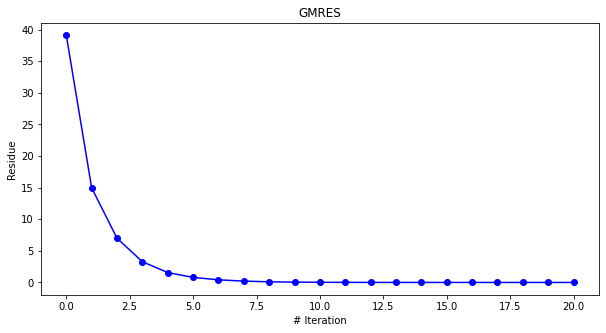

In [49]:
# plot the residue as a function of the iterations
res = [la.norm(A@s-b) for s in x]
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res, 'ob-')
ax.set_xlabel('# Iteration')
ax.set_ylabel('Residue')
ax.set_title('GMRES')
#ax.set_yscale('log')

## Run scipy implemented GMRES

In [40]:
la.norm((A @ x) - b)

4.68274251984131e-05

In [39]:
x, info = spla.gmres(A, b)
print(info)

0
